# **1. *Import Library***

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# **2. Data**

In [3]:
dt = pd.read_excel("Data Bintang.xlsx")
dt.head()

,Wilayah,PPM,IPM,RLS,JP,PBH,TBS,ASL,TPT,PDRB,JSM,UHH,LLR,PKB
0,Sumba Barat,27.17,65.22,6.92,152414,11.90,0.39,58.83,3.52,10199,12696,67.57,3.93,82.84
1,Sumba Timur,28.08,67.05,7.57,255498,5.87,0.30,61.81,2.21,16617,36053,65.82,2.02,68.79
2,Kupang,21.78,65.82,7.42,376837,6.17,1.18,76.42,3.22,13793,59622,65.64,4.20,72.78
3,Timor Tengah Selatan,25.18,63.58,6.97,474521,7.71,1.03,67.93,2.64,10953,57201,66.89,2.09,83.83
4,Timor Tengah Utara,21.85,65.16,8.16,271277,3.98,0.45,80.56,1.96,11511,42634,67.61,1.20,77.65


In [4]:
y = dt['IPM']
x = dt['PKB']
n = len(dt)

In [5]:
dt = pd.DataFrame({'y': y, 'x': x})
dt.head()

,y,x
0,65.22,82.84
1,67.05,68.79
2,65.82,72.78
3,63.58,83.83
4,65.16,77.65


# **3. Model**

In [10]:
model = smf.ols('y ~ x', data=dt).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     51.28
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.18e-07
Time:                        11:25:34   Log-Likelihood:                -47.421
No. Observations:                  22   AIC:                             98.84
Df Residuals:                      20   BIC:                             101.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.5716      1.992     39.951      0.0

Berdasarkan perhitungan, didapat dugaan persamaan regresi linear sebagai berikut. Dugaan persamaan tersebut dapat pula disebut sebagai nilai harapan dari peubah respons Y (Indeks Pembangunan Manusia)
$$
E[\hat{Y}]=\hat{Y}=79.572-0.192X
$$

# **4. Penguraian Kergaman**

Penguraian keragaman dugaan persamaan regresi linear dapat dilakukan terlebih dahulu secara eksploratif melalui visualisasi sebagai berikut. Dari scatter plot yang dihasilkan, dapat diamati dua persamaan garis, yaitu $\hat{Y}$ sebagai nilai harapan Y sekaligus dugaan persamaan dan $\bar{Y}$ sebagai rata-rata dari seluruh nilai $Y_i$ yang ada.

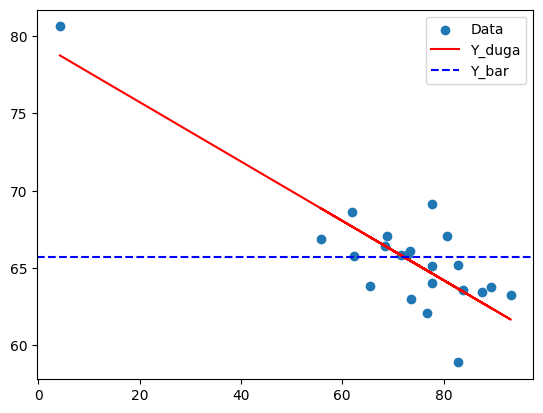

In [7]:
y_bar = np.mean(y)
plt.scatter(dt['x'], dt['y'], label='Data')
plt.plot(dt['x'], model.predict(x), color='red', label='Y_duga')
plt.axhline(y=y_bar, color='blue', linestyle='--', label='Y_bar')
plt.legend()
plt.show()

Dari scatter plot di atas, teramati adanya amatan yang menyimpang relatif terhadapn nilai harapannya. Penyimpangan amatan dari nilai harapannya inilah yang disebut sebagai galat. Keragaman dari galat tiap amatan ini dapat diurai berdasarkan garis dugaan persamaan $(\hat{Y})$ dan garis rataan nilai resposnya $(\bar{Y})$. Penguraian keragaman ini dapat dituliskan sebagai Jumlah Kuadrat Regresi (JKR), Jumlah Kuadrat Galat (JKG), dan Jumlah Kuadrat Total (JKT) dengan perhitungan sebagai berikut.

$$
JKR=\sum_{i=1}^{n}{(\hat{y_i}-\bar{y})^2}; JKG=\sum_{i=1}^{n}{(y_i-\hat{y})^2};JKT=\sum_{i=1}^{n}{(y_i-\bar{y})^2}
$$

Hubungan antara ketiganya dapat pula dituliskan sebagai berikut.

$$
JKT=JKR+JKG
$$

Nilai penguraian keragaman ini dapat diamati pula menggunakan fungsi `anova` pada bagian **Sum Sq (Jumlah Kuadrat)** seperti yang ditampilkan di bawah. Pada output sintaks di bawah, JKR model bernilai 246.082 dan JKG model bernilai 95.982

In [11]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

anova_table = anova_lm(model)
print(anova_table)

            df      sum_sq     mean_sq          F        PR(>F)
x          1.0  246.081706  246.081706  51.276759  6.179026e-07
Residual  20.0   95.981771    4.799089        NaN           NaN


Dari tabel ANOVA dan penguraian keragaman, dapat diduga pula **ragam galat/error** dari model yang kita peroleh. Secara umum, error dari model dapat diduga oleh nilai Kuadrat Tengah Galat (KTG) sehingga berdasarkan output sintaks di atas, diketahui bahwa ragam galat dari model bernilai 4.799. Hubungan antara keduanya dapat dituliskan sebagai berikut.

$$
\hat{\sigma^2}=S_e^2=KTG=\frac{JKG}{(n-2)}
$$

In [19]:
KTG = anova_table['mean_sq']['Residual']
print(f"KTG: {KTG:.3f}")

KTG: 4.799


Dari nilai dugaan ragam galat di atas, dapat diduga pula nilai dugaan dari simpangan bakunya. Dugaan simpangan baku inilah yang disebut sebagai **galat baku**. Hubungan antara galat baku dan ragam galat dapat dituliskan sebagai berikut.

$$
s_e=\sqrt{S_e^2}
$$

Oleh karena simpangan baku merupakan akar kuadrat dari ragam, maka nilai dugaan galat baku model yang kita bentuk adalah $S_e=\sqrt{4.799}\approx2.191$

In [20]:
galat_baku = np.sqrt(KTG)
print(f"Galat Baku: {galat_baku:.3f}")

Galat Baku: 2.191


# **5. Keragaman Dugaan Parameter**

## **a. Dugaan Parameter B0**

Sebelumnya, melalui fungsi `lm` dan perhitungan manual yang sudah dibahas pada pertemuan sebelumnya, kita sudah mendapatkan nilai dugaan parameter $\beta_0$ dan $\beta_1$ sebesar 79.572 dan -0.192. Kedua nilai dugaan parameter tersebut dapat kita definisikan sebagai berikut.

In [21]:
b0, b1 = model.params
print(f"b0: {b0:.3f}, b1: {b1:.3f}")

b0: 79.572, b1: -0.192


Selanjutnya kita dapat menghitung nilai ragam dan t-hitung dari dugaan parameter $\beta_0$ tersebut dengan perhitungan sebagai berikut.

$$
S_\hat{\beta_0}=\sqrt{KTG(\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^{n}{(x_i-\bar{x})^2}})};t_h=\frac{\hat{\beta_0}-\beta_0}{S_\hat{\beta_0}}
$$

Nilai $S_\hat{\beta_0}$ dapat dihitung dengan sintaks sebagai berikut


In [27]:
se_b0 = np.sqrt(KTG * (1/n + np.mean(dt['x'])**2 / np.sum((dt['x'] - np.mean(dt['x']))**2)))
print(f"se_b0: {se_b0:.3f}")

se_b0: 1.992


Jika dalam uji hipotesis kita ingin menguji apakah $\beta_0=0$, maka nilai $t_h$ dapat dihitung sebagai berikut.

In [28]:
t_b0 = b0 / se_b0
print(f"t_b0: {t_b0:.3f}")

t_b0: 39.951


## **b. Dugaan Parameter B1**

Sementara itu, ragam dan t-hitung dari dugaan parameter $\beta_1$ dapat diperoleh dari perhitungan berikut.

$$
S_\hat{\beta_1}=\sqrt{\frac{KTG}{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}};t_h=\frac{\hat{\beta_1}-\beta_1}{S_\hat{\beta_1}}
$$

Nilai $S_\hat{\beta_1}$ dapat dihitung dengan sintaks sebagai berikut

In [29]:
se_b1 = np.sqrt(KTG / np.sum((dt['x'] - np.mean(dt['x']))**2))
print(f"se_b1: {se_b1:.3f}")

se_b1: 0.027


Jika dalam uji hipotesis kita ingin menguji apakah $\beta_1=0$, maka nilai $t_h$ dapat dihitung sebagai berikut.

In [30]:
t_b1 = b1 / se_b1
print(f"t_b1: {t_b1:.3f}")

t_b1: -7.161


## **c. Selang Kepercayaan Parameter**

Secara umum, kita dapat memahami bahwa selang kepercayaan untuk $\hat{\beta_0}$ dan $\hat{\beta_1}$ terdiri atas batas bawah dan batas atas yang dapat dituliskan sebagai berikut.

$$
\hat{\beta_0}-t_{(n-2;\frac{\alpha}{2})}<\hat{\beta_0}<\hat{\beta_0}+t_{(n-2;\frac{\alpha}{2})}
$$

$$
\hat{\beta_1}-t_{(n-2;\frac{\alpha}{2})}<\hat{\beta_1}<\hat{\beta_1}+t_{(n-2;\frac{\alpha}{2})}
$$

Batas bawah untuk kedua dugaan parameter dalam taraf kepercayaan $\alpha=0.05$ dapat dihitung sebagai berikut.

In [31]:
alpha = 0.05
t_critical = abs(stats.t.ppf(alpha/2, df=n-2))

bb_b0 = b0 - t_critical * se_b0
ba_b0 = b0 + t_critical * se_b0

bb_b1 = b1 - t_critical * se_b1
ba_b1 = b1 + t_critical * se_b1

print(f"Selang kepercayaan Beta_0: ({bb_b0:.3f}, {ba_b0:.3f})")
print(f"Selang kepercayaan Beta_1: ({bb_b1:.3f}, {ba_b1:.3f})")

Selang kepercayaan Beta_0: (75.417, 83.726)
Selang kepercayaan Beta_1: (-0.248, -0.136)


Sehingga dapat disusun suatu selang kepercayaan untuk $\hat{\beta_0}$ dan $\hat{\beta_1}$ sebagai berikut.

$$
75.465<\hat{\beta_0}<83.678
$$

Yang dapat dimaknai bahwa dalam taraf kepercayaan 95%, diyakini bahwa dugaan parameter $\hat{\beta_0}$ berada dalam selang 75.465 hingga 83.678.

$$
-0.247<\hat{\beta_1}<-0.136
$$

Yang dapat dimaknai bahwa dalam taraf kepercayaan 95%, diyakini bahwa dugaan parameter $\hat{\beta_1}$ berada dalam selang -0.247 hingga -0.136.

# **6. Selang Kepercayaan**

## **a. Bagi Nilai Rataan / Nilai Harapan Amatan**

Secara umum, kita dapat memahami bahwa selang kepercayaan untuk $E(\hat{Y}|x_0)$ terdiri atas batas bawah dan batas atas yang dapat dituliskan sebagai berikut.

$$
E(\hat{Y}|x_0)\pm t_{(n-2;\frac{\alpha}{2})}S_e\sqrt{(\frac{1}{n}+\frac{{(x_i-\bar{x})^2}}{{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}})}
$$

Misalkan kita ingin menduga nilai rataan (harapan) amatan ketika nilai $x=17$. Kita dapat memanfaatkan fungsi `predict` untuk mendapatkan nilai dugaan dan selang kepercayaannya sebagai berikut.

In [32]:
x_pred = pd.DataFrame({'x': [17]})
x_pred = sm.add_constant(x_pred)
prediction_conf = model.get_prediction(x_pred).summary_frame(alpha=0.05)

print("Prediksi dengan Interval Kepercayaan:")
print(prediction_conf) #ambil yang mean

Prediksi dengan Interval Kepercayaan:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  76.307749  1.552344      73.069617      79.545882     70.707079   

   obs_ci_upper  
0     81.908419  


Berdasarkan output sintaks di atas, diketahui bahwa dugaan rataan nilai $Y$ ketika nilai $x=17$ adalah 76.308. Selain itu, diindikasikan juga bahwa dalam taraf kepercayaan 95%, diyakini bahwa nilai dugaan rataan $Y$ ketika nilai $x=17$ berada dalam selang 73.070 hingga 79.546.

## **b. Bagi Individu Amatan**

Secara umum, kita dapat memahami bahwa selang kepercayaan untuk $\hat{y}(s_i)$ terdiri atas batas bawah dan batas atas yang dapat dituliskan sebagai berikut.

$$
\hat{y}(x_i)\pm t_{(n-2;\frac{\alpha}{2})}S_e\sqrt{(1+\frac{1}{n}+\frac{{(x_i-\bar{x})^2}}{{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}})}
$$

Misalkan kita ingin menduga nilai individu amatan ketika nilai $x=17$. Kita dapat memanfaatkan fungsi `predict` untuk mendapatkan nilai dugaan dan selang kepercayaannya sebagai berikut.

In [34]:
print("Prediksi dengan Interval Individu:")
print(prediction_conf) #ambil yang obs

Prediksi dengan Interval Individu:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  76.307749  1.552344      73.069617      79.545882     70.707079   

   obs_ci_upper  
0     81.908419  


Berdasarkan output sintaks di atas, diketahui bahwa dugaan nilai individu $Y$ ketika nilai $x=17$ adalah 76.308. Selain itu, diindikasikan juga bahwa dalam taraf kepercayaan 95%, diyakini bahwa nilai amatan individu $Y$ ketika nilai $x=17$ berada dalam selang 70.707 hingga 81.908.